**Group Nubmer** : 39

**Participants** :
SU THET MIN HTET

AUNG KYAW SAW

KAUNG MYAT SOE

PYAE SONE HEIN

AUNG KAUNG

SOE MIN OO

In [ ]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
pip install transformers

In [ ]:
!pip install pandas pyarrow fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.6 MB/s eta 0:00:00


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.6 MB/s eta 0:00:00


In [ ]:
pip install wandb

# **Importing Related Libraries**

In [ ]:
import pandas as pd
import os
import wandb
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
from datasets import Dataset
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# **Load the dataset**

Load the english dataset.

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
eng_df = pd.read_csv("/content/drive/My Drive/218_GP_PROJECT/dataset/twitter_training.csv")
eng_df.columns = ["tweet_id", "entity", "sentiment", "text"]

eng_df = eng_df[["text", "sentiment"]]

# Add Language Column
eng_df["language"] = "en"

# Display Sample Data
print(eng_df.head())

                                                text sentiment language
0  I am coming to the borders and I will kill you...  Positive       en
1  im getting on borderlands and i will kill you ...  Positive       en
2  im coming on borderlands and i will murder you...  Positive       en
3  im getting on borderlands 2 and i will murder ...  Positive       en
4  im getting into borderlands and i can murder y...  Positive       en


In [ ]:
print(eng_df["sentiment"].unique())

['Positive' 'Neutral' 'Negative' 'Irrelevant']


Load the burmese dataset.

In [ ]:
file_path="/content/drive/My Drive/218_GP_PROJECT/dataset/burmese-sentiment-train.parquet"
burmese_df = pd.read_parquet(file_path, engine="pyarrow")
# Keep Only Text and Labels
burmese_df = burmese_df[["texts", "labels"]]

# Rename Columns for Consistency
burmese_df.columns = ["text", "sentiment"]

# Add Language Column for Burmese Dataset
burmese_df["language"] = "my"

# Check Dataset
print(burmese_df.head())

                                                text sentiment language
0                                အသံထွက်မကောင်းပါဘူး         1       my
1   စောက်ရေးမပါ mouse စောက်စုတ် ၁၀ ရက် ပဲခံလိုက်တယ်          1       my
2  ဝယ်ပြီး၂လ​ကျော်မှာပျက်သွားတယ် ပြင်ပြီးပြန်သုံး...         1       my
3              နားကြပ်ကတဖက်ပျတ်နေတယ် usbလဲပျတ်နေတယ်          1       my
4  10000mah မပါဘူး power bank ကိုအားအပြည့်သွင်းပြ...         1       my


In [ ]:
print(burmese_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2492 non-null   object
 1   sentiment  2492 non-null   object
 2   language   2492 non-null   object
dtypes: object(3)
memory usage: 58.5+ KB
None


In [ ]:
# Check data type of sentiment column
print(burmese_df["sentiment"].dtype)

# Check unique values
print(burmese_df["sentiment"].unique())


object
['1' '2' '3' '4' '5']


since the two dataset has different label ranges , we will set to three unqiue categories:Positive, Negative and Neutral

In [ ]:
burmese_df["sentiment"] = burmese_df["sentiment"].astype(int)
sentiment_mapping = {
    1: "Negative",  # Strongly Positive → Positive
    2: "Negative",  # Positive → Positive
    3: "Neutral",   # Neutral → Neutral
    4: "Positive",  # Negative → Negative
    5: "Positive"   # Strongly Negative → Negative
}

# Apply the Mapping
burmese_df["sentiment"] = burmese_df["sentiment"].map(sentiment_mapping)

we will also remove the **Irrevelant** value from 'eng_df' sentiment column.

In [ ]:
valid_sentiments = ["Positive", "Negative", "Neutral"]
eng_df = eng_df[eng_df["sentiment"].isin(valid_sentiments)]

Once both datasets have the same sentiment format, we can combine them:

In [ ]:
# Combine English and Burmese Datasets
combined_df = pd.concat([eng_df, burmese_df], ignore_index=True)

# Shuffle the dataset
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

# Display Final Dataset
print(combined_df.tail(50))

                                                    text sentiment language
64133  @EAMaddenNFL  please fix your servers. They ar...  Negative       en
64134  Will someone buy me a star pass on my FIFA mob...  Positive       en
64135  So have mistakenly chose my fifa 20. Well I’m ...  Negative       en
64136  Check out Apex Legends Pubs twitch.tv/jewels77...   Neutral       en
64137  Strangely enough, the Red Dead: Uprising 2 is ...  Positive       en
64138  <unk>.be/GN94mZgel40. Breaking Rules at PUBG M...   Neutral       en
64139  iPhone 11 Pro Max 3969mah RAM - greatest thing...  Negative       en
64140  @ATVIAssist I am having odd performance issues...   Neutral       en
64141  Tried to ring 911 for an emergency and my phon...  Negative       en
64142  Time to be the best medic in Battlefield V! tw...  Positive       en
64143  recently been playing Act 3 with five good hea...  Positive       en
64144                                                      Neutral       en
64145  > > T

# **Take a Quick Look at the Data Structure**

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64183 entries, 0 to 64182
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       63612 non-null  object
 1   sentiment  64183 non-null  object
 2   language   64183 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [ ]:
combined_df.head()

,text,sentiment,language
0,they went wrong.,Negative,en
1,@Lowes @HomeDepot seems Home improvement is mo...,Negative,en
2,When professional clubs botch the shirts,Negative,en
3,clips.tch.tv / SmallFuriousHi.... If you know ...,Positive,en
4,I recently took a break from World of Warcraft...,Neutral,en


# **Data Preprocesing**

According to the info output, we still need to clean data for better model performance.

firstly, we will remove missing values and duplicates.

In [ ]:
# Remove rows where 'text' is NaN
combined_df = combined_df.dropna(subset=['text'])

# Remove Duplicates
combined_df = combined_df.drop_duplicates(subset=['text'])


Next, we will remove unwanted symbols and extra spaces

In [ ]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions (@username)
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply Cleaning
combined_df["text"] = combined_df["text"].apply(clean_text)

Continuously, we will convert labels to categorical

In [ ]:
combined_df["sentiment"] = combined_df["sentiment"].astype("category")

# **Tokenize Data**

Now, our dataset is clean and optimized for training a transformer-based model.

In [ ]:
# Load Tokenizer
model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

we will convert the dataset into a Hugging Face Dataset and tokenize it.

In [ ]:
# Convert Pandas DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(combined_df)

# Tokenize Dataset
def tokenize_data(example):
    return tokenizer(example["text"], truncation=True, padding='max_length', max_length=128)

tokenized_dataset = dataset.map(tokenize_data, batched=True)

# Set Format for PyTorch
tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])


Map:   0%|          | 0/59781 [00:00<?, ? examples/s]

# **Split Dataset into Train and Test**

In [ ]:
train_df, validation_df = train_test_split(combined_df, test_size=0.2, stratify=combined_df["sentiment"])

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
validation_dataset = Dataset.from_pandas(validation_df)

# Apply Tokenization
train_dataset = train_dataset.map(tokenize_data, batched=True)
validation_dataset = validation_dataset.map(tokenize_data, batched=True)

# Convert Sentiment Labels to Numerical Values
label_mapping = {"Positive": 0, "Neutral": 1, "Negative": 2}
train_dataset = train_dataset.map(lambda x: {"labels": label_mapping[x["sentiment"]]})
validation_dataset = validation_dataset.map(lambda x: {"labels": label_mapping[x["sentiment"]]})

# Set Format for PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
validation_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Print dataset info
print(train_dataset)
print(validation_dataset)

Map:   0%|          | 0/47824 [00:00<?, ? examples/s]

Map:   0%|          | 0/11957 [00:00<?, ? examples/s]

Map:   0%|          | 0/47824 [00:00<?, ? examples/s]

Map:   0%|          | 0/11957 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'sentiment', 'language', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 47824
})
Dataset({
    features: ['text', 'sentiment', 'language', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 11957
})


# **Load Pretrained Model**

In [ ]:
num_labels = 3
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# **Train the Model**

In [ ]:
#define training arguments
training_args = TrainingArguments(
    output_dir="/content/drive/My Drive/218_GP_PROJECT/results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=20,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    report_to="none"
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset
)

output_dir = "/content/drive/My Drive/218_GP_PROJECT/results"
checkpoints = [ckpt for ckpt in os.listdir(output_dir) if "checkpoint" in ckpt]
if checkpoints:
    last_checkpoint = os.path.join(output_dir, sorted(checkpoints, key=lambda x: int(x.split('-')[-1]))[-1])
    print("Resuming from:", last_checkpoint)
else:
    print("No checkpoint found, training must start from scratch.")

# Train the Model
trainer.train(resume_from_checkpoint=last_checkpoint)

Resuming from: /content/drive/My Drive/218_GP_PROJECT/results/checkpoint-22425


/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:3441: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(os.path.join(checkpoint, OPTIMIZER_NAME), map_

Epoch,Training Loss,Validation Loss
16,0.498100,0.506362
17,0.424500,0.429643


Epoch,Training Loss,Validation Loss
16,0.498100,0.506362
17,0.424500,0.429643
18,0.363800,0.410786
19,0.325500,0.383117
20,0.311900,0.386632


TrainOutput(global_step=29900, training_loss=0.09748305341471797, metrics={'train_runtime': 2928.0675, 'train_samples_per_second': 326.659, 'train_steps_per_second': 10.212, 'total_flos': 6.291568044711936e+16, 'train_loss': 0.09748305341471797, 'epoch': 20.0})

# **Evaluate the Model**

In [ ]:
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

trainer.compute_metrics = compute_metrics

In [ ]:
results = trainer.evaluate()
print(results)

{'eval_loss': 0.3831167221069336, 'eval_accuracy': 0.867859831061303, 'eval_precision': 0.868802202805965, 'eval_recall': 0.867859831061303, 'eval_f1': 0.867920538474844, 'eval_runtime': 36.8209, 'eval_samples_per_second': 324.734, 'eval_steps_per_second': 10.157, 'epoch': 20.0}


In [ ]:
predictions = trainer.predict(validation_dataset)
y_pred = predictions.predictions.argmax(axis=-1)  # Get predicted class labels
y_true = validation_dataset["labels"]

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      4245
           1       0.83      0.83      0.83      3428
           2       0.91      0.87      0.89      4284

    accuracy                           0.87     11957
   macro avg       0.87      0.87      0.87     11957
weighted avg       0.87      0.87      0.87     11957



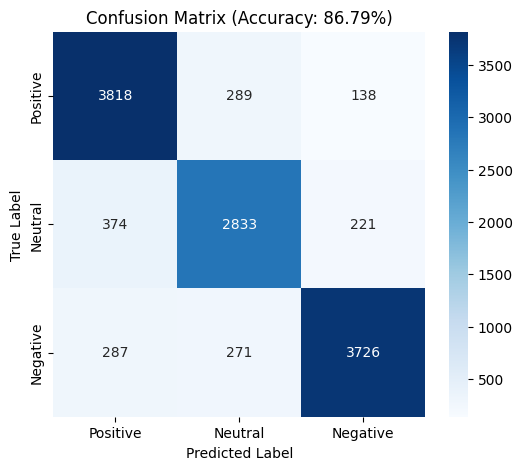

In [ ]:

# ========== Get Predictions from Trainer ==========
predictions = trainer.predict(validation_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)  # Get predicted labels
y_true = predictions.label_ids  # Get true labels

# ========== Plot Confusion Matrix ==========
def plot_confusion_matrix(y_true, y_pred, label_list):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_list, yticklabels=label_list)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix (Accuracy: {acc:.2%})")
    plt.show()

# Update with your actual class labels
label_list = ["Positive", "Neutral", "Negative"]
plot_confusion_matrix(y_true, y_pred, label_list)



#**Prediction**

In [ ]:
def predict_sentiment(text):
    # Move inputs to the same device as the model
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(model.device)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment = torch.argmax(predictions, dim=1).item()
    confidence = torch.max(predictions).item() * 100
    return sentiment, confidence

In [ ]:
text = "အဆင်မပြေဘူး"
sentiment, confidence = predict_sentiment(text)
print(f"Sentiment: {sentiment} (Confidence: {confidence:.2f}%)")

Sentiment: 0 (Confidence: 70.59%)


In [ ]:
text2="I dislike this food"
sentiment2,confidence2=predict_sentiment(text2)
print(f"Sentiment {sentiment2}(Confidence:{confidence2:.2f}%)")

Sentiment 2(Confidence:87.07%)


In [ ]:
def predict_user_input(user_input, tokenizer, model):
    # Tokenize the user input
    inputs = tokenizer(user_input, return_tensors="pt", truncation=True, padding=True)

    # Move inputs to the same device as the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    # Get model prediction
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted class
    predicted_class = torch.argmax(outputs.logits, dim=1).item()

    return predicted_class

In [ ]:
user_input = input("Enter a sentence (or relevant input for your model): ")

# Replace with your actual tokenizer & model
predicted_label = predict_user_input(user_input, tokenizer, model)

print(f"Predicted Class: {predicted_label}")

Enter a sentence (or relevant input for your model): ပေးရတဲ့စျေးနဲ့တန်ပါတယ်
Predicted Class: 0
